In [1]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
X = pd.read_csv('Dataset/data_with_clusters.csv')
Y = pd.read_csv('Dataset/pros_targets.csv')

In [3]:
print(X.isnull().sum())
X = X.dropna()

0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11          0
12          0
13          0
14          0
Clusters    0
dtype: int64


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42) 

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train, Y_train)

C:\Users\devas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [7]:
Y_pred = model.predict(X_test)

In [8]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

In [9]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 0.21079710144927538
Mean Squared Error: 0.1148268115942029
Root Mean Squared Error: 0.33886105057117866
R² Score: 0.5405962605042016


In [12]:
print(type(Y_test))  # Should print <class 'numpy.ndarray'>
print(type(Y_pred))  # Should print <class 'numpy.ndarray'>
print(Y_test.shape)  # Check if it's (n, 1) or similar
print(Y_pred.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(138, 1)
(138,)


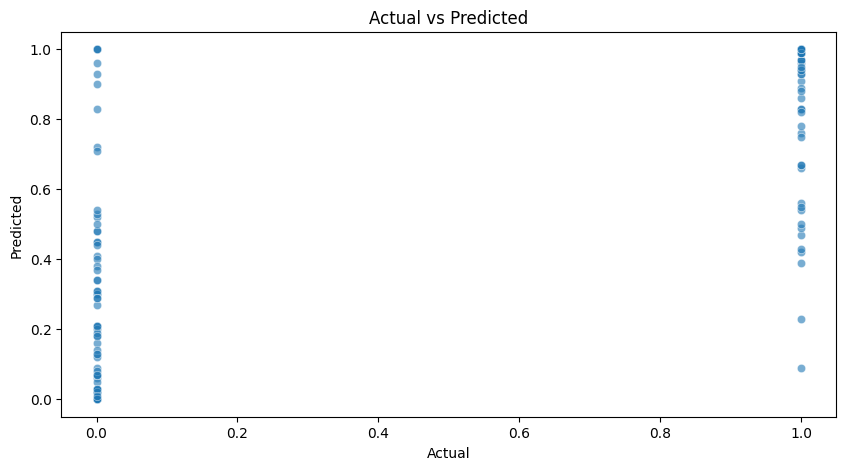

In [13]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=Y_test.values.ravel(), y=Y_pred, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [14]:
joblib.dump(model, 'loan_prediction_model.pkl')

['loan_prediction_model.pkl']